## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import radians, cos, sin, asin, sqrt

# Exploration

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data['id'].nunique()

21420

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


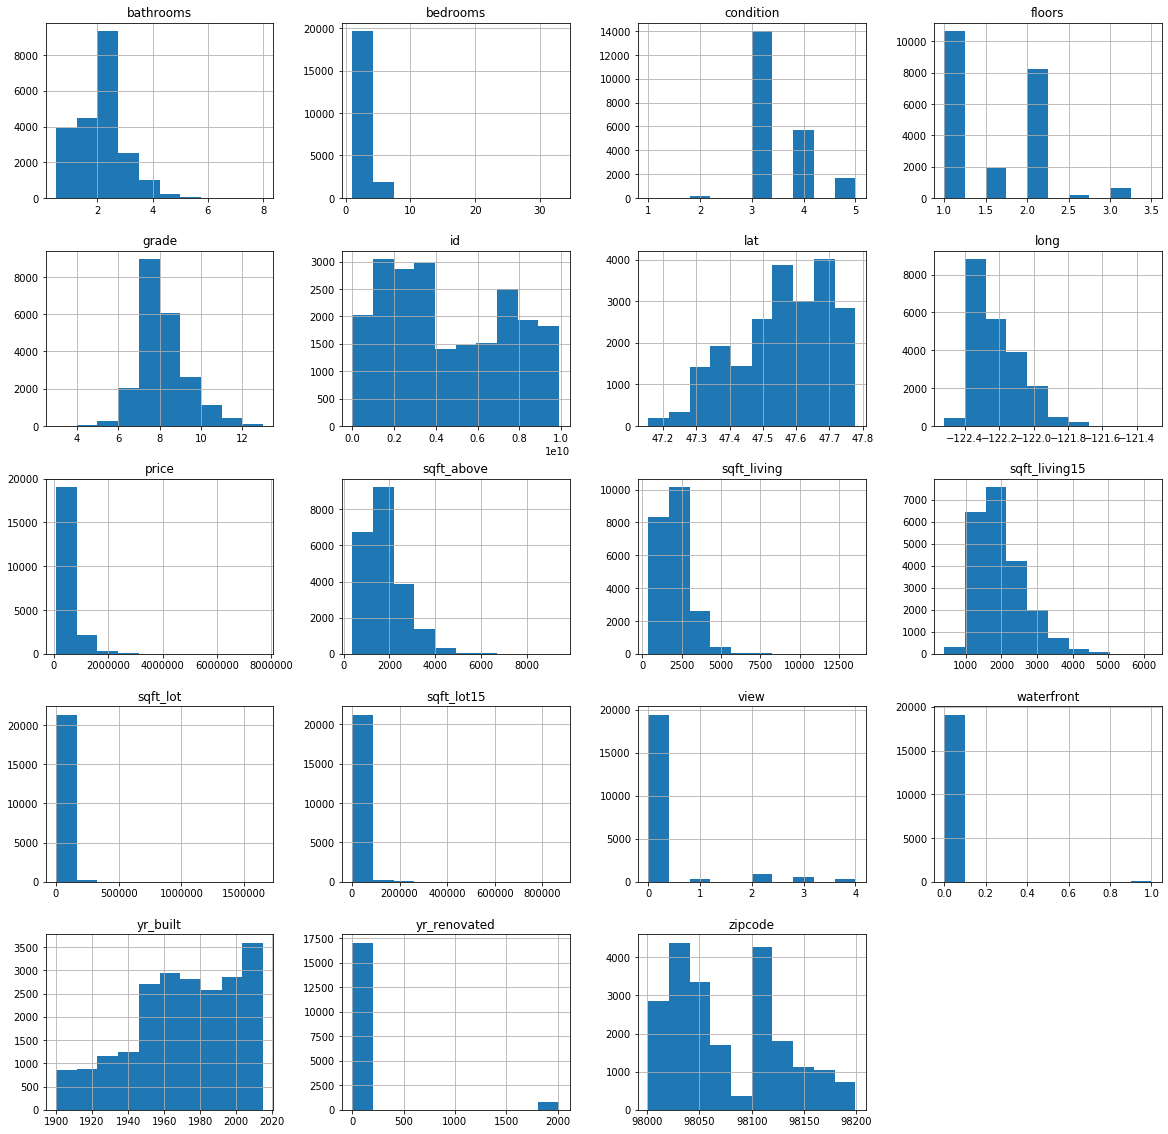

In [6]:
data.hist(figsize=(20,20));

Based on the skews in some of these distributions it seems likely that there are outliers in price, bedrooms, sqft_above, sqft_living, sqft_lot, sqft_lot15. 

Additionally, there are several binomial distributions that should be converted to categorical data. 

# Cleaning

### Address Outliers

#### Independent Variable- Price

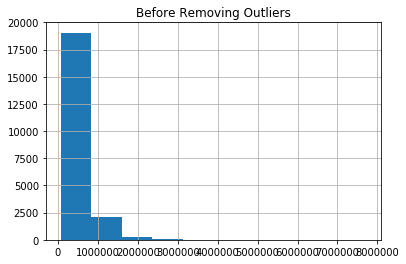

In [7]:
plt.title('Before Removing Outliers')
data['price'].hist();

In [8]:
cutoff = data['price'].quantile(.95)
cutoff

1160000.0

In [9]:
data[data['price']>cutoff]['price'].describe()

count    1.066000e+03
mean     1.707364e+06
std      6.599177e+05
min      1.170000e+06
25%      1.300000e+06
50%      1.500000e+06
75%      1.870000e+06
max      7.700000e+06
Name: price, dtype: float64

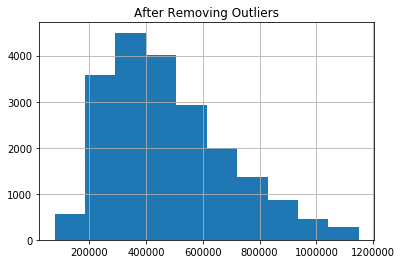

In [10]:
plt.title('After Removing Outliers')
data[data['price']<cutoff]['price'].hist();

It appears there are some significant outliers causing right leaning skew in the data. By dropping houses that sold for over $1,160,000 (5 percent of the data) the distribution appears observably more normal. 

In [11]:
data = data[data['price']<cutoff]
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.051300e+04,2.051300e+04,20513.000000,20513.000000,20513.000000,2.051300e+04,20513.000000,18238.000000,20454.000000,20513.000000,20513.000000,20513.000000,20513.000000,16872.000000,20513.000000,20513.000000,20513.000000,20513.000000,20513.000000
mean,4.601563e+09,4.791037e+05,3.334276,2.055514,1981.343879,1.466203e+04,1.476527,0.002961,0.174294,3.406474,7.537903,1712.829328,1970.841320,74.274241,98078.513821,47.557097,-122.213176,1926.114513,12462.408570
std,2.877363e+09,2.112197e+05,0.910827,0.712861,781.962556,4.017872e+04,0.536588,0.054335,0.645026,0.646936,1.043487,732.934603,29.164756,377.774512,53.336480,0.140912,0.142299,619.123059,26539.735841
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.130702e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,0.000000,98033.000000,47.461000,-122.330000,1470.000000,5053.000000
50%,3.905060e+09,4.390000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,1974.000000,0.000000,98065.000000,47.567100,-122.231000,1800.000000,7557.000000
75%,7.338001e+09,6.050000e+05,4.000000,2.500000,2440.000000,1.034900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9900.000000
max,9.900000e+09,1.150000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


#### Bedrooms

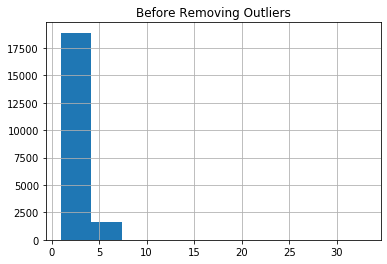

In [12]:
plt.title('Before Removing Outliers')
data['bedrooms'].hist();

In [13]:
data[data['bedrooms']>8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,1/6/2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
18428,8823901445,3/13/2015,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,...,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


33 bedrooms in a 1620 sqft house seems like it was likely a typo. I'll impute 3 as the number of rooms. For the remaining eight values I'll remove them from the sample.  

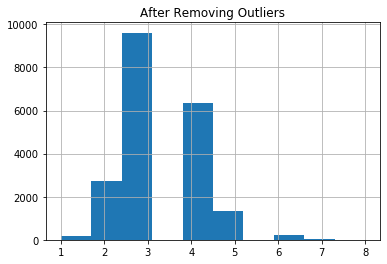

In [14]:
data.loc[data['bedrooms']==33, 'bedrooms']=3
data = data[data['bedrooms']<=8]
plt.title('After Removing Outliers')
data['bedrooms'].hist();

#### sqft_above

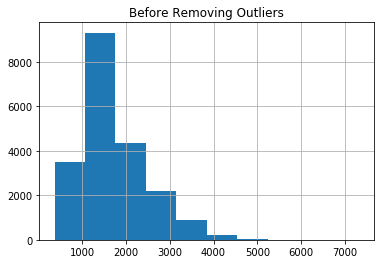

In [15]:
plt.title('Before Removing Outliers')
data['sqft_above'].hist();

In [16]:
data['sqft_above'].quantile(.95)

3190.0

In [17]:
data['sqft_above'].quantile(.98)

3590.0

In [18]:
data['sqft_above'].quantile(.999)

4750.0

In [19]:
data[data['sqft_above']>4750]['sqft_above'].describe()

count      20.000000
mean     5280.000000
std       551.858105
min      4800.000000
25%      4945.000000
50%      5165.000000
75%      5390.000000
max      7320.000000
Name: sqft_above, dtype: float64

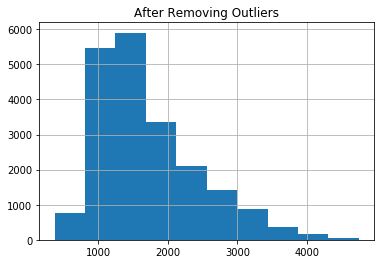

In [20]:
data = data[data['sqft_above']<=4750]
plt.title('After Removing Outliers')
data['sqft_above'].hist();

#### sqft_living

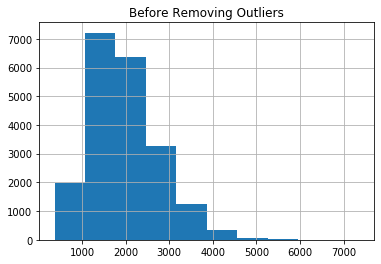

In [21]:
plt.title('Before Removing Outliers')
data['sqft_living'].hist();

In [22]:
data['sqft_living'].quantile(.999)

5146.120000000228

In [23]:
data[data['sqft_living']>5146]['sqft_living'].describe()

count      21.000000
mean     5645.952381
std       464.650565
min      5180.000000
25%      5360.000000
50%      5545.000000
75%      5774.000000
max      7350.000000
Name: sqft_living, dtype: float64

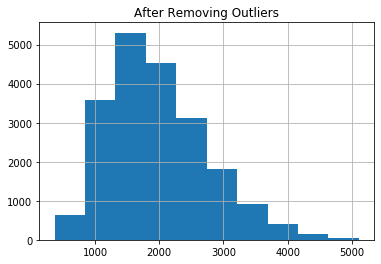

In [24]:
data = data[data['sqft_living']<=5146]
plt.title('After Removing Outliers')
data['sqft_living'].hist();

#### sqft_lot

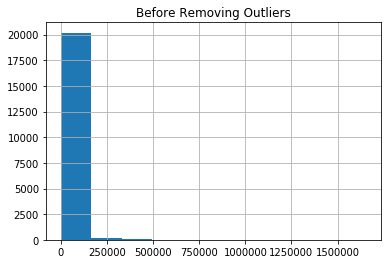

In [25]:
plt.title('Before Removing Outliers')
data['sqft_lot'].hist();

In [26]:
data['sqft_lot'].quantile(.9)

19965.0

In [27]:
data[data['sqft_lot']>19965]['sqft_lot'].describe()

count    2.046000e+03
mean     7.941785e+04
std      1.043913e+05
min      1.996600e+04
25%      2.962250e+04
50%      4.203500e+04
75%      8.045325e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

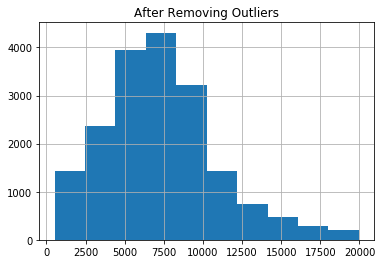

In [28]:
data = data[data['sqft_lot']<=19965]
plt.title('After Removing Outliers')
data['sqft_lot'].hist();

#### sqft_lot15

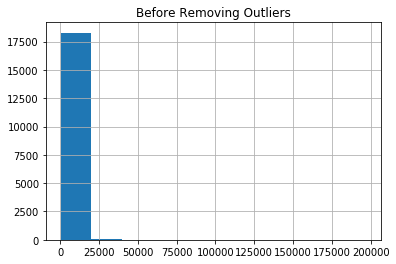

In [29]:
plt.title('Before Removing Outliers')
data['sqft_lot15'].hist();

In [30]:
data['sqft_lot15'].quantile(.925)

11970.0

In [31]:
data[data['sqft_lot15']>22816]['sqft_lot15'].describe()

count        80.00000
mean      41401.27500
std       29796.26587
min       22979.00000
25%       25925.00000
50%       32088.50000
75%       43565.75000
max      196591.00000
Name: sqft_lot15, dtype: float64

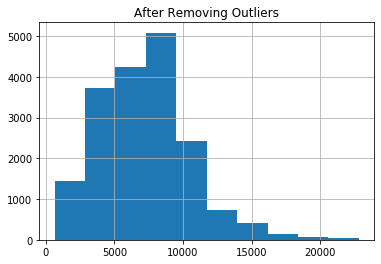

In [32]:
data = data[data['sqft_lot15']<=22816]
plt.title('After Removing Outliers')
data['sqft_lot15'].hist();

In [33]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.833800e+04,1.833800e+04,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000,16274.000000,18284.000000,18338.000000,18338.000000,18338.000000,18338.000000,15071.000000,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000
mean,4.748607e+09,4.687078e+05,3.313829,2.029542,1914.752972,7293.931999,1.475624,0.001598,0.156421,3.407951,7.476497,1650.941160,1970.198768,70.991175,98081.318301,47.560459,-122.227009,1870.233232,7177.032883
std,2.872225e+09,2.069278e+05,0.876235,0.702068,726.986688,3595.849490,0.542697,0.039940,0.605027,0.648141,0.986752,682.806412,29.883377,369.708514,53.973824,0.138034,0.133581,587.713745,3296.490422
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.503000,460.000000,651.000000
25%,2.310050e+09,3.100000e+05,3.000000,1.500000,1370.000000,4831.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1150.000000,1950.000000,0.000000,98033.000000,47.474025,-122.336000,1440.000000,4992.000000
50%,4.058802e+09,4.275000e+05,3.000000,2.000000,1810.000000,7200.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1470.000000,1972.000000,0.000000,98074.000000,47.569850,-122.265000,1760.000000,7209.000000
75%,7.504460e+09,5.900000e+05,4.000000,2.500000,2350.000000,9282.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2010.000000,1997.000000,0.000000,98118.000000,47.680175,-122.149000,2190.000000,8976.000000
max,9.900000e+09,1.150000e+06,8.000000,5.750000,5110.000000,19965.000000,3.500000,1.000000,4.000000,5.000000,12.000000,4670.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,22800.000000


In [34]:
data['id'].nunique()

18178

### Null Values

In [35]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2064
view               54
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3267
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [36]:
display(data['waterfront'].value_counts(dropna=False))
display(data['view'].value_counts(dropna=False))

0.0    16248
NaN     2064
1.0       26
Name: waterfront, dtype: int64

0.0    16971
2.0      685
3.0      269
1.0      251
4.0      108
NaN       54
Name: view, dtype: int64

For these particular variables, which are skewed so heavily toward zero, I will simply impute 0.

In [37]:
data.loc[data['waterfront'].isna(), 'waterfront']=0
data.loc[data['view'].isna(), 'view']=0

Considering that so many null values exist yr_renovated column, I will need to be creative. I'll create a column called 'yrs since renovation' by combining the date built or renovated with the date sold. First, I'll impute the value of the date built to replace null values for yr_renovated. Later, I can use that information to create new features that capture the same information in a more succint way. 

In [38]:
data['yr_renovated'].value_counts(dropna=False)

0.0       14535
NaN        3267
2014.0       64
2013.0       28
2000.0       22
          ...  
1950.0        1
1953.0        1
1948.0        1
1934.0        1
1981.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [39]:
data.loc[data['yr_renovated'].isna(), 'yr_renovated']=0
data.loc[
    data['yr_renovated']==0,'yr_renovated']=data.loc[
    data['yr_renovated']==0]['yr_built']

In [40]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data[:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
5,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,1995.0,98003,47.3097,-122.327,2238,6819
6,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711
7,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,1960.0,98146,47.5123,-122.337,1780,8113
8,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,2003.0,98038,47.3684,-122.031,2390,7570
9,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,8,1860,1700.0,1965,1965.0,98007,47.6007,-122.145,2210,8925


### Convert datatypes

In [41]:
#Trying to convert sqft_basement to float called an error.
data['sqft_basement'].value_counts()

0.0       11014
?           394
500.0       195
600.0       191
700.0       183
          ...  
1760.0        1
1810.0        1
20.0          1
875.0         1
207.0         1
Name: sqft_basement, Length: 246, dtype: int64

The ? in the sqft_basement column won't work. I'll use the other data I have to deduce the values for this column. 

In [42]:
data['sqft_basement']=(data['sqft_living']-data['sqft_above'])
data['sqft_basement'].describe()

count    18338.000000
mean       263.811812
std        397.362123
min          0.000000
25%          0.000000
50%          0.000000
75%        510.000000
max       2300.000000
Name: sqft_basement, dtype: float64

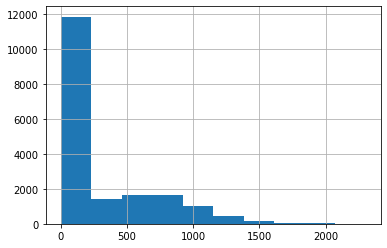

In [43]:
data['sqft_basement'].hist();

In [44]:
data['zipcode'].nunique()

70

Zipcode is not a continuous variable. Normally I would need to use one-hot encoding to make it into a useable categorical variable, however, considering the availabilty of location based data and the messiness of creating 70 new categorical variables, I will simply drop the column from the sample.

In [45]:
data.loc[data['waterfront']==1, 'waterfront'] = 'WaterFront'
data.loc[data['waterfront']==0, 'waterfront'] = 'Not'

data['waterfront'].astype('category', copy=False)
wfdummies = pd.get_dummies(data['waterfront'])
data = data.join(wfdummies, how='outer')

#Drop columns to avoid the dummy-trap.
data.drop(['Not', 'zipcode'], axis=1, 
          inplace=True)

### Duplicates

In [46]:
data.duplicated().sum()

0

# Feature Creation

I want to be able to use age to describe the houses, so I'll create a feature that stores their age at sale. 

### Month  and Year Sold

In [47]:
data['date']=pd.to_datetime(data['date'])

data['month_sold'] = np.array([date[5:7] 
                               for date 
                               in data['date'].astype(str)])
data['month_sold'] = data['month_sold'].astype('int64')

data['year_sold'] = np.array([date[:4] 
                               for date 
                               in data['date'].astype(str)])
data['year_sold'] = data['year_sold'].astype('int64')
data.drop('date', axis=1, inplace=True)

In [48]:
m_list = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']
for num in range(1,13):
    data.loc[data['month_sold']==num, 'month_sold'] = m_list[num-1]

data['month_sold'].astype('category', copy=False)
mondummies = pd.get_dummies(data['month_sold'])
data = data.join(mondummies, how='outer')

### Age

In [49]:
data['age'] = data['year_sold']-data['yr_built']

### Years Since Renovation

In [50]:
data['yrs_reno'] = data['year_sold']- data['yr_renovated']
data['yrs_reno'].describe()

count    18338.000000
mean        42.386847
std         29.523654
min         -1.000000
25%         15.000000
50%         39.000000
75%         62.000000
max        115.000000
Name: yrs_reno, dtype: float64

### Renovated?
I'll also add a categorical variable that can be used to determine if renovation itself is a meaningful indicator of value. 

In [51]:
data.loc[data['yrs_reno']-data['age']<0, 
         'Renovated?']='Renovated'
data.loc[data['yrs_reno']-data['age']==0, 
         'Renovated?']='Not'
data['Renovated?'].value_counts(dropna=False)

Not          17802
Renovated      536
Name: Renovated?, dtype: int64

In [52]:
data['Renovated?'].astype('category', copy=False)
rendummies = pd.get_dummies(data['Renovated?'])
data = data.join(rendummies, how='outer')
data.drop(['Not'], axis=1, inplace=True)

### City Data
A more decipherable way to utilize the latitude and longitude data is to calculate the distance between each house and the major cities in King County. I can use that information to estimate what city that house resides in, providing another means for analysis. 

I'll use the haversine formula to calculate the miles of distance from the center of particular cities to each house. I'll then use that formula to create columns for the distance to each city and additional columns for the categorical information of what city each house resides in. For this analysis I'll use the largest 5 cities by population in the King County area. 

In [53]:
def haversine(city):
    """
    Return distance in miles between house and city.
    
    Parameters
    city-- tuple, coordinates(lon,lat) for a city
    
    """
    dists = []
    for i in range(0,len(data['long'])):
        lon1, lat1, lon2, lat2 = map(radians, 
                                     [data['long'][i],
                                      data['lat'][i],
                                      city[0], city[1]])
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = (sin(dlat/2)**2 + cos(lat1) 
             * cos(lat2) * sin(dlon/2)**2)
        c = 2 * asin(sqrt(a)) 
        r = 3956 # Radius of earth in miles. 
        dists.append(round(c*r,2))
    return np.array(dists)       

In [54]:
data['long'].describe()

count    18338.000000
mean      -122.227009
std          0.133581
min       -122.503000
25%       -122.336000
50%       -122.265000
75%       -122.149000
max       -121.315000
Name: long, dtype: float64

In [55]:
Seattle = (-122.335167, 47.608013, 'Seattle')
Bellevue = (-122.1994444, 47.6105556, 'Bellevue')
Renton = (-122.2158333, 47.4830556, 'Renton') 
Kent = (-122.2336111, 47.3811111, 'Kent')
Federal_Way = (-122.3113889, 47.3225, 'Federal Way')

city_list = [Seattle, Bellevue, Renton, 
             Kent, Federal_Way]

for city in city_list:
    data['dist_to_{}'.format(city[2])] = haversine(city)

In [56]:
city_dist_cols = [('dist_to_{}'.format(city[2]), city[2]) 
                  for city in city_list]
nearest_cities = []

for i in range(0,len(data['long'])):
    dists = []
    for city_dist in city_dist_cols:
        dists.append(((data[city_dist[0]][i]), city_dist[1]))
    nearest_cities.append(sorted(dists)[0][1])
    
data['nearest_city'] = nearest_cities

In [57]:
data[['dist_to_Seattle', 'dist_to_Bellevue',
     'dist_to_Renton', 'dist_to_Kent',
     'dist_to_Federal Way', 'nearest_city']]

,dist_to_Seattle,dist_to_Bellevue,dist_to_Renton,dist_to_Kent,dist_to_Federal Way,nearest_city
0,7.61,7.37,2.73,9.05,13.27,Renton
1,7.84,9.44,17.12,23.80,27.52,Seattle
2,10.15,8.93,17.61,24.63,28.91,Bellevue
3,6.60,10.94,8.67,12.18,14.21,Seattle
4,13.52,7.20,12.19,18.50,23.82,Bellevue
...,...,...,...,...,...,...
18333,6.32,9.17,16.11,22.59,26.07,Seattle
18334,6.83,10.24,7.08,10.77,13.21,Seattle
18335,1.93,4.77,8.61,15.04,18.78,Seattle
18336,13.40,8.03,7.71,13.09,18.51,Renton


In [58]:
data['nearest_city'].value_counts()

Seattle        6741
Bellevue       4894
Renton         3031
Kent           2304
Federal Way    1368
Name: nearest_city, dtype: int64

In [59]:
data['nearest_city'].astype('category', copy=False)
ncdummies = pd.get_dummies(data['nearest_city'])
data = data.join(ncdummies, how='outer')

### Size Relative to Neighbors

I'd like to test the old real estate addage that the biggest house on the block has lower than expected value by creating an additional feature that tracks the size of a home compared with its nearst 15 neighbors.

In [60]:
data['rel_size_living'] = (data['sqft_living']
                           /data['sqft_living15'])
data['rel_size_lot'] = data['sqft_lot']/data['sqft_lot15']

In [61]:
data.head()[['sqft_living', 'sqft_living15', 
             'rel_size_living',
             'sqft_lot', 'sqft_lot15', 
             'rel_size_lot']]

,sqft_living,sqft_living15,rel_size_living,sqft_lot,sqft_lot15,rel_size_lot
0,1180,1340,0.880597,5650,5650,1.000000
1,2570,1690,1.520710,7242,7639,0.948030
2,770,2720,0.283088,10000,8062,1.240387
3,1960,1360,1.441176,5000,5000,1.000000
4,1680,1800,0.933333,8080,7503,1.076903


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18338 entries, 0 to 18337
Data columns (total 51 columns):
id                     18338 non-null int64
price                  18338 non-null float64
bedrooms               18338 non-null int64
bathrooms              18338 non-null float64
sqft_living            18338 non-null int64
sqft_lot               18338 non-null int64
floors                 18338 non-null float64
waterfront             18338 non-null object
view                   18338 non-null float64
condition              18338 non-null int64
grade                  18338 non-null int64
sqft_above             18338 non-null int64
sqft_basement          18338 non-null int64
yr_built               18338 non-null int64
yr_renovated           18338 non-null float64
lat                    18338 non-null float64
long                   18338 non-null float64
sqft_living15          18338 non-null int64
sqft_lot15             18338 non-null int64
WaterFront             18338 non-null ui

# Build a Baseline Model
In order to fit a baseline model for use in comparisons with the more complete model I will conduct these steps:
1. Handle Muliticolinearity
2. Standardize Variables
3. Fit and Validate the Baseline Model

## 1. Handle Multicolinearity 

In [63]:
high_corr = ((abs(data.corr())> .8).sum()>1)
pd.set_option('display.max_rows', 200)
high_corr

id                     False
price                  False
bedrooms               False
bathrooms              False
sqft_living             True
sqft_lot                True
floors                 False
view                   False
condition              False
grade                  False
sqft_above              True
sqft_basement          False
yr_built                True
yr_renovated            True
lat                     True
long                   False
sqft_living15          False
sqft_lot15              True
WaterFront             False
year_sold              False
Apr                    False
Aug                    False
Dec                    False
Feb                    False
Jan                    False
Jul                    False
Jun                    False
Mar                    False
May                    False
Nov                    False
Oct                    False
Sep                    False
age                     True
yrs_reno                True
Renovated     

In [64]:
data[['sqft_living', 'sqft_above', 'lat', 'dist_to_Seattle',
      'dist_to_Bellevue', 'dist_to_Kent', 
      'dist_to_Federal Way']].corr()

,sqft_living,sqft_above,lat,dist_to_Seattle,dist_to_Bellevue,dist_to_Kent,dist_to_Federal Way
sqft_living,1.000000,0.842922,0.010270,0.138057,-0.042729,0.025868,0.059517
sqft_above,0.842922,1.000000,-0.060444,0.269670,0.051454,-0.008617,0.032054
lat,0.010270,-0.060444,1.000000,-0.621484,-0.687565,0.886384,0.919227
dist_to_Seattle,0.138057,0.269670,-0.621484,1.000000,0.832369,-0.305993,-0.345251
dist_to_Bellevue,-0.042729,0.051454,-0.687565,0.832369,1.000000,-0.361199,-0.487441
dist_to_Kent,0.025868,-0.008617,0.886384,-0.305993,-0.361199,1.000000,0.965133
dist_to_Federal Way,0.059517,0.032054,0.919227,-0.345251,-0.487441,0.965133,1.000000


To avoid multicolinearity issues I will drop sqft_above, because the information already exists in a combination of sqft_living and sqft_basement, so it's exclusion will not hinder the model. In addition, the categorical variables for nearest city will serve my purposes sufficiently and distance variables to each city aside from Seattle(by far the biggest city in the county) will be dropped. 

In [65]:
data.drop(['sqft_above', 'dist_to_Bellevue', 'dist_to_Kent', 
           'dist_to_Federal Way','dist_to_Renton'], axis=1,
          inplace=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18338 entries, 0 to 18337
Data columns (total 46 columns):
id                 18338 non-null int64
price              18338 non-null float64
bedrooms           18338 non-null int64
bathrooms          18338 non-null float64
sqft_living        18338 non-null int64
sqft_lot           18338 non-null int64
floors             18338 non-null float64
waterfront         18338 non-null object
view               18338 non-null float64
condition          18338 non-null int64
grade              18338 non-null int64
sqft_basement      18338 non-null int64
yr_built           18338 non-null int64
yr_renovated       18338 non-null float64
lat                18338 non-null float64
long               18338 non-null float64
sqft_living15      18338 non-null int64
sqft_lot15         18338 non-null int64
WaterFront         18338 non-null uint8
month_sold         18338 non-null object
year_sold          18338 non-null int64
Apr                18338 non-null u

## 2. Standardize Variables 
To standardize the data I'll be using scikit learn's Robust Scalar function because of the existence of significant outliers in the independent variable, price.

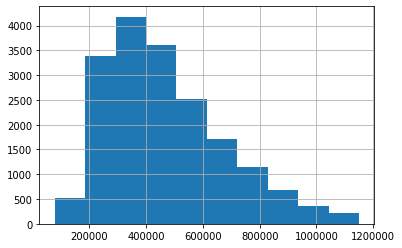

In [67]:
data['price'].hist();
data.drop('id', axis=1, inplace=True)

In [68]:
#Separate data into categorical and continuous groups. 
cat_data = data.select_dtypes(include='uint8')

con_data = (data.select_dtypes(exclude='uint8')
#Keep certain categorical data separate to use for visuals.
            .drop(['Renovated?', 'month_sold', 'nearest_city', 
                  'waterfront'], axis=1))
groups = data[['Renovated?', 'month_sold', 'nearest_city',
               'waterfront']]
con_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,lat,long,sqft_living15,sqft_lot15,year_sold,age,yrs_reno,dist_to_Seattle,rel_size_living,rel_size_lot
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0,...,47.5112,-122.257,1340,5650,2014,59,59.0,7.61,0.880597,1.000000
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400,...,47.7210,-122.319,1690,7639,2014,63,23.0,7.84,1.520710,0.948030
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0,...,47.7379,-122.233,2720,8062,2015,82,82.0,10.15,0.283088,1.240387
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910,...,47.5208,-122.393,1360,5000,2014,49,49.0,6.60,1.441176,1.000000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0,...,47.6168,-122.045,1800,7503,2015,28,28.0,13.52,0.933333,1.076903


In [69]:
def scale(col):
    return (con_data[col]
            -con_data[col].mean())/con_data[col].std()

In [70]:
#Scale the continuous data. 
scaled_con_data = pd.DataFrame([])
for col in con_data.columns:
    scaled_con_data[col] = scale(col) 
scaled_con_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,lat,long,sqft_living15,sqft_lot15,year_sold,age,yrs_reno,dist_to_Seattle,rel_size_living,rel_size_lot
count,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,...,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04
mean,-3.262026e-15,5.038807e-16,7.734982e-15,7.013209e-17,1.213508e-16,3.115623e-16,1.853905e-15,-9.235774e-15,-1.902481e-14,-4.536367e-15,...,-1.447055e-12,1.483820e-12,9.260536e-17,1.116398e-17,2.295712e-13,-1.124232e-15,-1.396333e-15,-1.356799e-15,-3.363175e-15,1.351342e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.888136e+00,-2.640650e+00,-2.178623e+00,-2.124871e+00,-1.883820e+00,-8.764095e-01,-2.581290e-01,-3.715167e+00,-4.536597e+00,-6.639078e-01,...,-2.930857e+00,-2.066090e+00,-2.399524e+00,-1.979691e+00,-6.938827e-01,-1.509939e+00,-1.469562e+00,-1.600821e+00,-2.669225e+00,-3.076535e+00
25%,-7.669718e-01,-3.581566e-01,-7.542605e-01,-7.493301e-01,-6.848679e-01,-8.764095e-01,-2.581290e-01,-6.294170e-01,-4.828942e-01,-6.639078e-01,...,-6.261750e-01,-8.159145e-01,-7.320456e-01,-6.628361e-01,-6.938827e-01,-9.076531e-01,-9.276239e-01,-8.095649e-01,-5.324676e-01,-3.136558e-01
50%,-1.991409e-01,-3.581566e-01,-4.207921e-02,-1.440920e-01,-2.612234e-02,-8.764095e-01,-2.581290e-01,-6.294170e-01,-4.828942e-01,-6.639078e-01,...,6.803686e-02,-2.844026e-01,-1.875628e-01,9.697318e-03,-6.938827e-01,-7.114472e-02,-1.147164e-01,-1.836692e-01,-1.166364e-01,-9.034131e-02
75%,5.861571e-01,7.830902e-01,6.701021e-01,5.987001e-01,5.528785e-01,9.662410e-01,-2.581290e-01,9.134582e-01,5.305315e-01,6.195563e-01,...,8.672951e-01,5.839831e-01,5.440859e-01,5.457219e-01,1.441087e+00,6.649826e-01,6.643200e-01,6.245863e-01,3.386872e-01,1.177889e-01
max,3.292415e+00,5.348078e+00,5.299281e+00,4.395193e+00,3.523804e+00,3.730217e+00,6.362249e+00,2.456333e+00,4.584234e+00,5.124263e+00,...,1.573098e+00,6.827376e+00,5.240250e+00,4.739273e+00,1.441087e+00,2.371460e+00,2.459491e+00,5.696660e+00,1.686314e+01,3.822799e+01


In [71]:
#Join continuous and categorical data. 
model_data = scaled_con_data.join(cat_data, how='outer')
model_data.head()

#Save complete dataset for visualising later.
data_fin = model_data.join(groups, how='outer')

# Build a Baseline Model

In [72]:
X = model_data.drop('price', axis=1)
y = model_data['price']
y.describe()

count    1.833800e+04
mean    -3.262026e-15
std      1.000000e+00
min     -1.888136e+00
25%     -7.669718e-01
50%     -1.991409e-01
75%      5.861571e-01
max      3.292415e+00
Name: price, dtype: float64

In [73]:
(X_train,X_test,
 y_train,y_test)=train_test_split(X,y,test_size=.2,
                                  random_state=37)

To begin I'll fit a model with all the data in order to establish a baseline for future models.

In [74]:
linreg = LinearRegression()
model1 = linreg.fit(X_train,y_train)

In [75]:
def report(model, ind_train, ind_test):
    """
    Print relevant statistics for a model.
    
    Parameters:
    model: Fitted LinearRegression object
    ind_train: independent variables for training set
    ind_test: independent variables for test set
    """
    pred_y_train = model.predict(ind_train)
    pred_y_test = model.predict(ind_test)
    
    #Print top 5% of variables by size of coefficient.
    coefs = []
    high_coefs = []
    for i in range(0, len(model.coef_)):
        coefs.append((model.coef_[i],ind_train.columns[i]))
    for coef in coefs:
        if abs(coef[0]) > abs(np.quantile(model.coef_,.95)):
            high_coefs.append(coef)
    print('High Impact Variables:\n')
    for variable in high_coefs:
        print('Variable: {}\nCoefficient: {}\n'
              .format(variable[1],variable[0]))

    #Print MSE for the train an test set.
    train_mse = mean_squared_error(y_train, pred_y_train)
    test_mse = mean_squared_error(y_test, pred_y_test)
    print('\nTrain MSE: {}\nTest MSE: {}\nDifference:{}\n'
          .format((train_mse),(test_mse),
                  (train_mse-test_mse)))
    
    #Print R^2 against the test data. 
    print('Train R^2: {}'
          .format((r2_score(y_train,pred_y_train))))
    print('Test R^2: {}\n'
          .format((r2_score(y_test,pred_y_test))))
    

    plotdf = pd.DataFrame([])
    plotdf['test_resids'] = pred_y_test-y_test
    plotdf['y_test'] = y_test
    sns.jointplot(x = 'y_test', y = 'test_resids',
                  data=plotdf, kind='kde')
    plt.show();
    
    plt.scatter(pred_y_test, y_test)
    plt.plot(pred_y_test, pred_y_test, color='black', 
             label='Predicted Price')
    plt.legend();

High Impact Variables:

Variable: sqft_living
Coefficient: 0.3126512636284088

Variable: dist_to_Seattle
Coefficient: -0.48816353300630744

Variable: WaterFront
Coefficient: 1.2387579798474342

Variable: Renton
Coefficient: -0.37996277217035995


Train MSE: 0.22878769911110655
Test MSE: 0.24426906270890758
Difference:-0.015481363597801029

Train R^2: 0.7698488269538981
Test R^2: 0.761241649105667



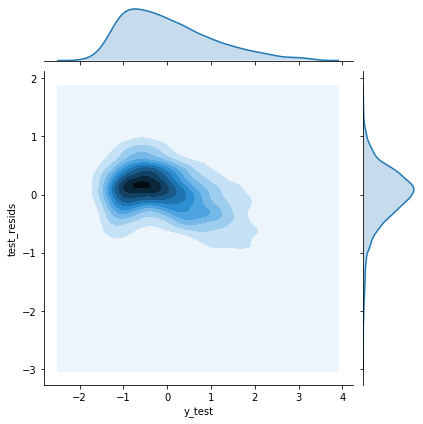

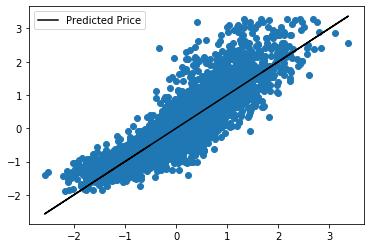

In [76]:
report(model1, X_train, X_test)

In [77]:
pred_y = model1.predict(X)


In [78]:
X['resids']= pred_y - y
X['price']=y
X.loc[abs(X['resids'])>1.75].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,...,Oct,Sep,Renovated,Bellevue,Federal Way,Kent,Renton,Seattle,resids,price
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.312473,0.277301,0.369963,0.196852,0.187389,0.236693,0.086350,0.248444,0.174352,-0.198117,...,0.061856,0.082474,0.020619,0.340206,0.0,0.061856,0.103093,0.494845,-1.580488,2.198005
std,1.240943,1.170329,1.100095,1.137320,1.066679,1.375757,1.260969,1.247569,1.161386,1.147686,...,0.242145,0.276515,0.142842,0.476240,0.0,0.242145,0.305660,0.502571,1.252910,1.312858
min,-2.640650,-1.822533,-2.069849,-1.654667,-0.876410,-0.258129,-3.715167,-4.536597,-0.663908,-2.349091,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-2.780666,-1.636840
25%,-0.358157,-0.398170,-0.501733,-0.637939,-0.876410,-0.258129,-0.629417,-0.482894,-0.663908,-0.843237,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-2.041787,2.084264
50%,0.783090,0.314011,0.516168,0.054248,0.044916,-0.258129,-0.629417,0.530531,-0.663908,-0.408212,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.890818,2.760829
75%,0.783090,1.026193,1.176427,0.892993,0.966241,-0.258129,0.913458,1.543957,0.997046,0.997251,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,-1.816962,3.050785
max,3.065584,2.806646,3.501092,3.203991,2.808892,6.362249,2.456333,2.557383,4.042127,1.499202,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.691653,3.292415


In [79]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,...,Oct,Sep,Renovated,Bellevue,Federal Way,Kent,Renton,Seattle,resids,price
count,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,1.833800e+04,...,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000,18338.000000,1.833800e+04
mean,5.038807e-16,7.734982e-15,7.013209e-17,1.213508e-16,3.115623e-16,1.853905e-15,-9.235774e-15,-1.902481e-14,-4.536367e-15,-1.204511e-15,...,0.087032,0.082452,0.029229,0.266878,0.074599,0.125641,0.165285,0.367597,-0.003893,-3.262026e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.281890,0.275059,0.168452,0.442340,0.262751,0.331453,0.371448,0.482164,0.481541,1.000000e+00
min,-2.640650e+00,-2.178623e+00,-2.124871e+00,-1.883820e+00,-8.764095e-01,-2.581290e-01,-3.715167e+00,-4.536597e+00,-6.639078e-01,-2.349091e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.780666,-1.888136e+00
25%,-3.581566e-01,-7.542605e-01,-7.493301e-01,-6.848679e-01,-8.764095e-01,-2.581290e-01,-6.294170e-01,-4.828942e-01,-6.639078e-01,-6.759198e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.249745,-7.669718e-01
50%,-3.581566e-01,-4.207921e-02,-1.440920e-01,-2.612234e-02,-8.764095e-01,-2.581290e-01,-6.294170e-01,-4.828942e-01,-6.639078e-01,6.027540e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033054,-1.991409e-01
75%,7.830902e-01,6.701021e-01,5.987001e-01,5.528785e-01,9.662410e-01,-2.581290e-01,9.134582e-01,5.305315e-01,6.195563e-01,8.968609e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.292817,5.861571e-01
max,5.348078e+00,5.299281e+00,4.395193e+00,3.523804e+00,3.730217e+00,6.362249e+00,2.456333e+00,4.584234e+00,5.124263e+00,1.499202e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.691653,3.292415e+00


Based on the MSE and R-squared, the model seems fairly accurate. However, based on the KDE plot of residuals, it is clear that the model could be more generalizable, especially for high value homes. Polynomial relationships may be causing drift. 

# Train the Model
In order to train the model and verify it's validity I will conduct the following steps:

1. Find and include interaction features.
2. Find and include polynomial features.
3. Satisfy Assumptions.
4. Validate Model

During this process I will continually test the models and eliminate variables that do not serve the model.

## Find and Include Interaction Features

In [80]:
def plot_interaction(col1, col2):
    """
    Plot the regression lines of variables grouped by
    high and low values. Non-parellel lines show 
    interaction of variables.
    
    Parameters:
    col1: pandas Series. Variable to group by.
    col2: pandas Series. Variable to plot by
    """
    sample = X_train.join(y_train, how='outer')
    
    hisample = (sample.loc[sample[col1]
                           >sample[col1].quantile(.5)])
    losample = (sample.loc[sample[col1]
                           <sample[col1].quantile(.5)])
    
    sns.regplot(x=col2, y='price', data=hisample, 
                scatter=False, truncate=True, 
                label='High Values of {}'.format(col1))
    sns.regplot(x=col2, y='price', data=losample, 
                scatter=False, 
                label='Low Values of {}'.format(col1))
    plt.title('Interaction of {} and {}'.format(col1, col2))
    plt.legend()
    plt.show();
    print('\n*********************\n')

In [81]:
def find_interactions(n, model, ind_train):
    """
    Returns n most predictive interactions based on low MSE.
    
    Parameters:
    n: int. the number of interactions selected.
    model: LinearRegression() object being tested. 
    ind_train: the independent variables in the training set.
    """
    combos = list(combinations(ind_train.columns, 2))
    print('Testing {} combinations.\n'.format(len(combos)))
    inters = [(100,0,0)]*n
    temp_X = ind_train.loc[:]
    for combo in combos:
        temp_X['interaction']=(ind_train.loc[:, combo[0]]
                               *ind_train.loc[:, combo[1]])
        linreg = LinearRegression()
        model = linreg.fit(temp_X, y_train)
        y_pred = model.predict(temp_X)
        score = round(mean_squared_error(y_train, y_pred),3)
        if score < inters[-1][0]:
            inters.append((score, combo[0], combo[1]))
            inters = sorted(inters, reverse=False)[:n]
    for inter in inters:
        print('MSE including interaction of {} and {}: {}'
              .format(inter[1], inter[2], inter[0]))
        plot_interaction(inter[1], inter[2])
    fin_inters = [i[1:] for i in inters]
    return fin_inters

Testing 780 combinations.

MSE including interaction of lat and dist_to_Seattle: 0.211


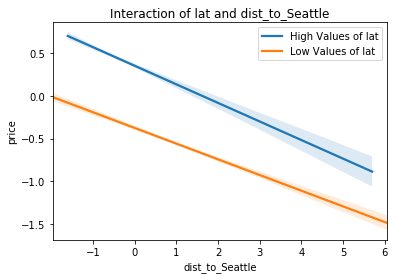


*********************

MSE including interaction of grade and dist_to_Seattle: 0.213


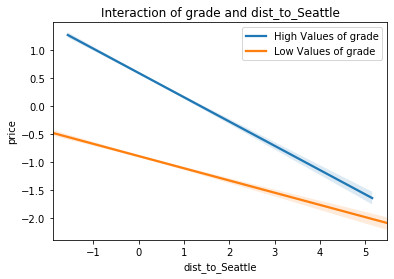


*********************

MSE including interaction of sqft_living and dist_to_Seattle: 0.215


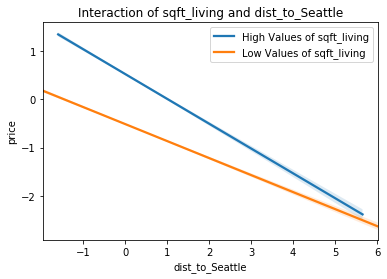


*********************

MSE including interaction of sqft_living15 and dist_to_Seattle: 0.215


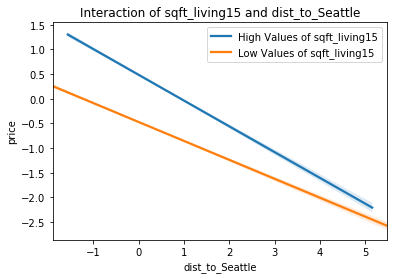


*********************

MSE including interaction of lat and Seattle: 0.22


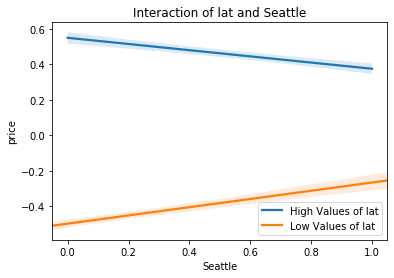


*********************

MSE including interaction of grade and Seattle: 0.221


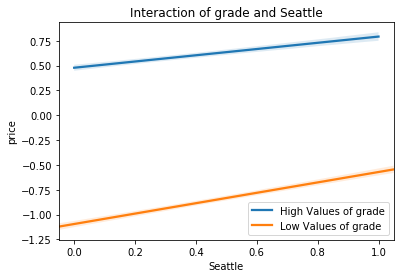


*********************

MSE including interaction of lat and long: 0.221


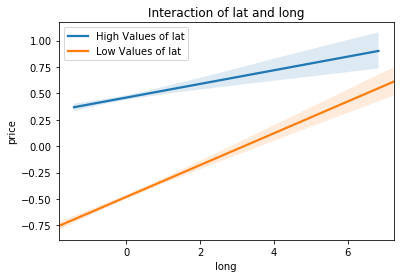


*********************

MSE including interaction of grade and lat: 0.222


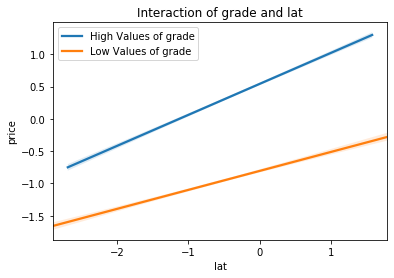


*********************

MSE including interaction of long and Seattle: 0.222


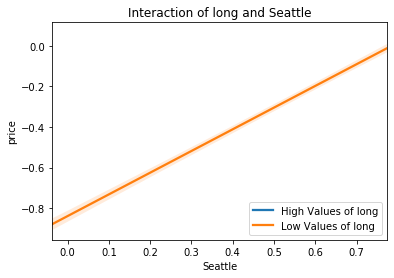


*********************

MSE including interaction of sqft_living and Seattle: 0.222


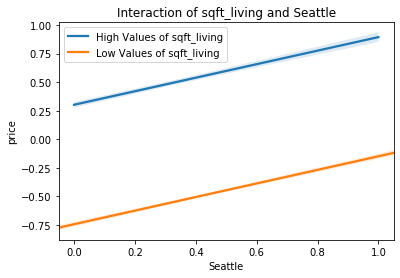


*********************

MSE including interaction of sqft_living and lat: 0.222


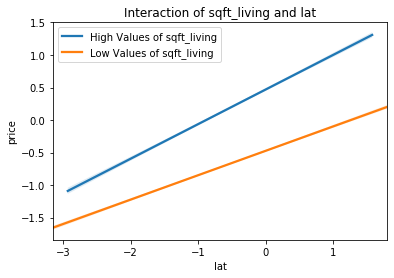


*********************

MSE including interaction of dist_to_Seattle and Bellevue: 0.223


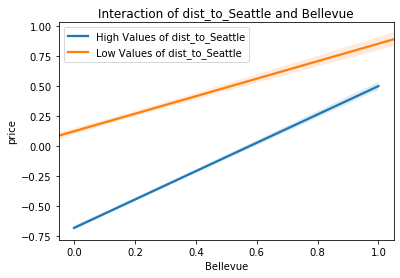


*********************

MSE including interaction of grade and Kent: 0.223


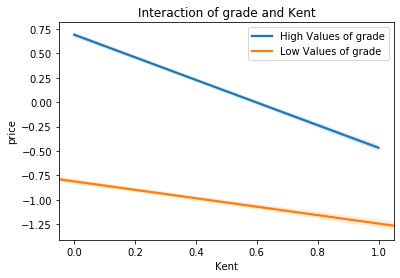


*********************

MSE including interaction of long and dist_to_Seattle: 0.223


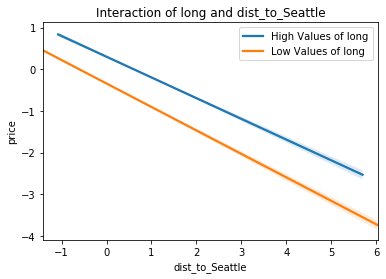


*********************

MSE including interaction of dist_to_Seattle and Kent: 0.224


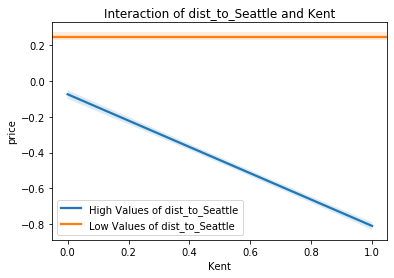


*********************

MSE including interaction of lat and Kent: 0.224


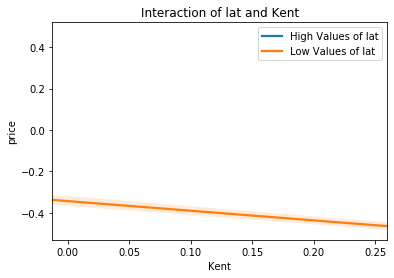


*********************

MSE including interaction of sqft_living and Kent: 0.224


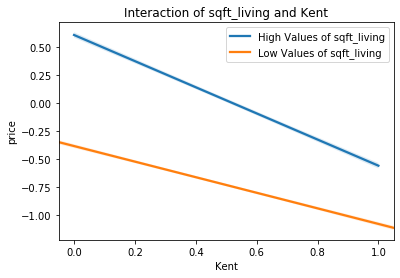


*********************

MSE including interaction of sqft_living15 and Kent: 0.224


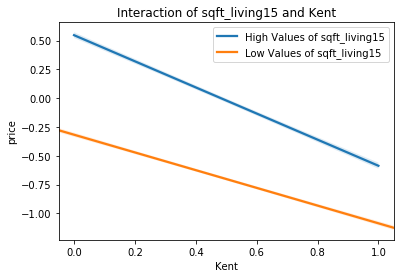


*********************

MSE including interaction of sqft_living15 and Seattle: 0.224


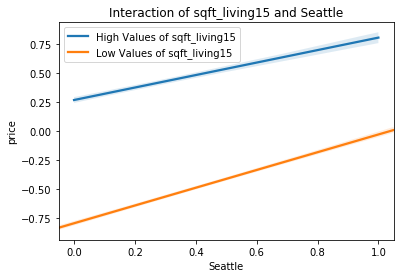


*********************

MSE including interaction of bathrooms and dist_to_Seattle: 0.225


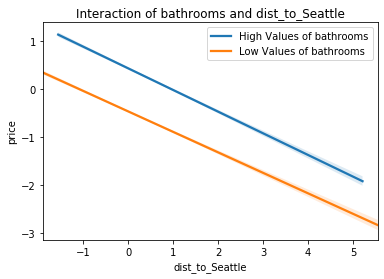


*********************



In [82]:
interactions = find_interactions(20, model1, X_train)

It's clear that a home's relationship to Seattle is important to this analysis. In order to account for this I will first remove any interactions that showed parellell relationships in the plots or are redundant. In the case of redundancies I will use the interaction of distance rather than city so as to not overly weight any city. 

I will then create a model that includes six of the most impactful interactions. See complete description of why I reasoned that each interaction warranted inclusion in the README.

In [83]:
print('Homes south of Seattle: {}'
      .format(data[data['lat']<47.608013]['lat'].count()))
print('Distance of Farthest Southern home: {}'
      .format(47.608013-data['lat'].min()))
print('Distance of Farthest Nothern home: {}'
      .format(data['lat'].max()-47.608013))
data['lat'].describe()

Homes south of Seattle: 10634
Distance of Farthest Southern home: 0.4521129999999971
Distance of Farthest Nothern home: 0.16958699999999993


count    18338.000000
mean        47.560459
std          0.138034
min         47.155900
25%         47.474025
50%         47.569850
75%         47.680175
max         47.777600
Name: lat, dtype: float64

In [84]:
bad = [('grade', 'Seattle'),('grade', 'lat'),
       ('sqft_living', 'Seattle'),('sqft_living', 'lat'),
       ('grade', 'Kent'),('long', 'Seattle'),
       ('lat', 'Seattle'),('dist_to_Seattle', 'Bellevue'),
       ('dist_to_Seattle', 'Kent'),('lat', 'Kent'),
       ('sqft_living', 'Kent'),('sqft_living15', 'Kent'),
       ('sqft_living15', 'Seattle'),
       ('bathrooms', 'dist_to_Seattle')]
for inter in bad:
    interactions.remove(inter)

In [85]:
def add_interactions(interactions, ind_train, ind_test):
    """
    Use forward selection based on lowest MSE to select
    and add most predictive interactions to a new model.
    
    Parameters:
    interactions: list of tuples outputed by find_interaction
    function.
    ind_train: independent variables training data.
    ind_test: independent variables test data.
    
    Returns:
    (new_model, new_x_with_interactions)
    """
    additions = interactions
    X_temp_tr = ind_train.loc[:]
    X_best_tr = ind_train.loc[:]
    X_best_t = ind_test.loc[:]
    scores = []
    baseline = 100
    while additions:
        for inter in additions:
            X_temp_tr[inter[0]
                      +' * '
                      +inter[1]]=(X_temp_tr.loc[:, inter[0]]
                                  *X_temp_tr.loc[:, inter[1]])
            linreg = LinearRegression()
            model = linreg.fit(X_temp_tr, y_train)
            y_pred = model.predict(X_temp_tr)
            score = round(mean_squared_error(y_train,
                                             y_pred),5)
            scores.append((score, inter[0], inter[1]))
            best = sorted(scores)[0]
            x_temp_tr = X_best_tr.loc[:]
        scores = []
        if best[0] <= baseline:
            additions.remove(best[1:])
            baseline = best[0]
            X_best_tr[best[1]
                      +' * '
                      +best[2]]=(X_temp_tr.loc[:, best[1]]
                                 * X_temp_tr
                                 .loc[:, best[2]])
            X_best_t[best[1]
                     +' * '
                     +best[2]]=(X_best_t.loc[:, best[1]]
                                *X_best_t.loc[:, best[2]])
            linreg = LinearRegression()
            model = linreg.fit(X_best_tr, y_train)
            y_pred = model.predict(X_best_tr)
            t_pred = model.predict(X_best_t)
            print('Interaction Added: {} * {}'
                  .format(best[1], best[2]))
            print('Current Train MSE: {}'
                  .format(best[0]))
            print('Current Test MSE: {}'
                  .format(round(mean_squared_error
                                (y_test, t_pred),5)))
            print('Current Difference: {}\n'
                  .format(round(best[0]
                          -round(mean_squared_error
                                 (y_test, t_pred),5),5)))
        else:
            print('complete')
            break
    linreg = LinearRegression()
    new_model = linreg.fit(X_best_tr, y_train)
    return(new_model, X_best_tr, X_best_t)

In [86]:
model2, X_train2, X_test2 = add_interactions(interactions, 
                                             X_train, X_test)

Interaction Added: long * dist_to_Seattle
Current Train MSE: 0.19173
Current Test MSE: 0.23873
Current Difference: -0.047

Interaction Added: grade * dist_to_Seattle
Current Train MSE: 0.19173
Current Test MSE: 0.22592
Current Difference: -0.03419

Interaction Added: lat * dist_to_Seattle
Current Train MSE: 0.19173
Current Test MSE: 0.21173
Current Difference: -0.02

Interaction Added: lat * long
Current Train MSE: 0.19173
Current Test MSE: 0.21121
Current Difference: -0.01948

Interaction Added: sqft_living * dist_to_Seattle
Current Train MSE: 0.19173
Current Test MSE: 0.20847
Current Difference: -0.01674

Interaction Added: sqft_living15 * dist_to_Seattle
Current Train MSE: 0.19173
Current Test MSE: 0.20818
Current Difference: -0.01645



High Impact Variables:

Variable: yr_renovated
Coefficient: -1103506374705.9763

Variable: yrs_reno
Coefficient: -1103724879166.685

Variable: Bellevue
Coefficient: 68988691092.32968

Variable: Federal Way
Coefficient: 68988691092.28963

Variable: Seattle
Coefficient: 68988691092.18994


Train MSE: 0.19172547561448994
Test MSE: 0.20817921763488462
Difference:-0.01645374202039468

Train R^2: 0.8071319249813874
Test R^2: 0.796517307014807



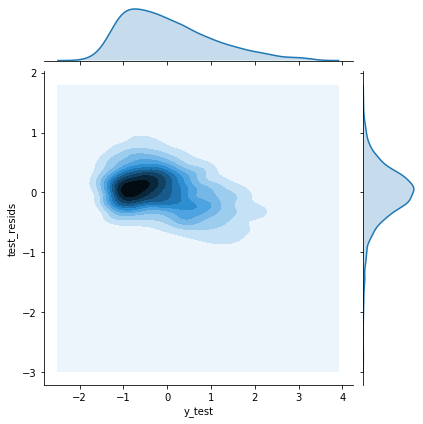

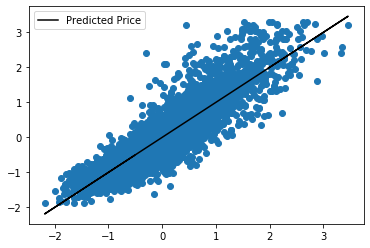

In [87]:
report(model2, X_train2, X_test2 )

## Find and include Polynomial Features
To find polynomial features I will iterate through the data, attempting to find data that suggests a polynomial relationship between price and the independent variable. I will then   

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
train_set = X_train2.join(y_train, how='outer')

In [90]:
def get_polynomial_features():
    features = []
    for col in X_train2.columns:
        scores = []
        for degree in range(1,10):
            df = pd.DataFrame(X_train2[col])
            poly = PolynomialFeatures(degree)
            X_poly_train = poly.fit_transform(df)
            reg_poly = LinearRegression().fit(X_poly_train,
                                              y_train)
            y_pred = reg_poly.predict(X_poly_train)
            score = round(mean_squared_error(y_train,
                                             y_pred),5)
            scores.append((score, degree, col))
            best_score = sorted(scores)[0] 
        if best_score[1] > 1:
            print('Variable: {} should be factored by {}'
                  .format(best_score[2], 
                          best_score[1]))
            features.append(best_score)
    return features 

In [91]:
poly_feat = get_polynomial_features()

Variable: bedrooms should be factored by 7
Variable: bathrooms should be factored by 9
Variable: sqft_living should be factored by 7
Variable: sqft_lot should be factored by 9
Variable: floors should be factored by 5
Variable: view should be factored by 4
Variable: condition should be factored by 4
Variable: grade should be factored by 9
Variable: sqft_basement should be factored by 9
Variable: yr_built should be factored by 9
Variable: yr_renovated should be factored by 9
Variable: lat should be factored by 8
Variable: long should be factored by 9
Variable: sqft_living15 should be factored by 9
Variable: sqft_lot15 should be factored by 9
Variable: age should be factored by 9
Variable: yrs_reno should be factored by 9
Variable: dist_to_Seattle should be factored by 9
Variable: rel_size_living should be factored by 9
Variable: rel_size_lot should be factored by 9
Variable: long * dist_to_Seattle should be factored by 9
Variable: grade * dist_to_Seattle should be factored by 9
Variable:

In [92]:
X_train2 = X_train2.reset_index()
X_train2.drop('index', axis=1, inplace=True)

In [93]:
X_test2 = X_test2.reset_index()
X_test2.drop('index', axis=1, inplace=True)

In [94]:
X_train3 = X_train2.loc[:]
X_test3 = X_test2.loc[:]
for feat in poly_feat: 
    X_train3[feat[2]+'^2'] = X_train3[feat[2]]**feat[1]
    X_test3[feat[2]+'^2'] = X_test3[feat[2]]**feat[1]
    
linreg = LinearRegression()
model3 = linreg.fit(X_train3, y_train)

High Impact Variables:

Variable: sqft_living
Coefficient: 0.4471737767570337

Variable: grade
Coefficient: 0.2431136094229918

Variable: dist_to_Seattle
Coefficient: -0.6667626442415635

Variable: WaterFront
Coefficient: 1.214360349984416

Variable: Bellevue
Coefficient: 0.3359343398265547

Variable: lat * dist_to_Seattle
Coefficient: -0.3564084580244082


Train MSE: 0.18424934601228848
Test MSE: 0.2003648447986259
Difference:-0.016115498786337418

Train R^2: 0.8146526090237395
Test R^2: 0.8041553875435803



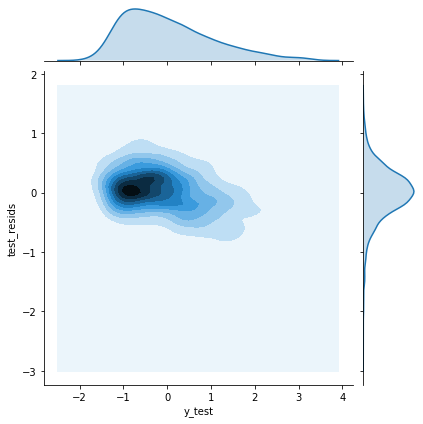

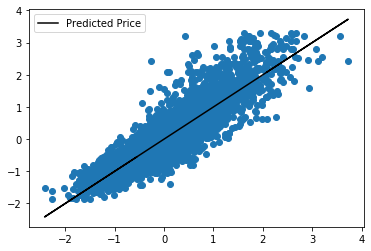

In [95]:
report(model3, X_train3, X_test3)

In [ ]:
X_train3.head()

In [ ]:
train = pd.DataFrame(X_train2[feat[2]])
    X_poly_train = poly.fit_transform(train)
    
    test = pd.DataFrame(X_test2[feat[2]])
    X_poly_test = poly.fit_transform(test)

In [ ]:
for col in X_train2.columns:
    plotdf = pd.DataFrame([])
    plotdf[col] = X_train2[col]
    plotdf['price'] = y_train
    sns.lmplot(x = col, y = 'price',
               data=plotdf, 
               line_kws={'color':'black', 'linestyle':':'})
    plt.show();

In [ ]:
def optimize_variables(X,y):
    """
    Forward selects variables by adjusted R^2.
    
    Parameters:
    X: pandas dataframe. independent variables.
    y: pandas series. dependent variable.
    
    Returns:
    Optimized model. 
    """
current_score, best_score = 0, 0
remaining = set(X.columns)
selected = pd.DataFrame()
while remaining and not current_score > best_score:
    scores_with_candidates = []
    for candidate in remaining:
        test_x = selected.join(X[str(candidate)], how='outer')
        score = sm.OLS(y,test_x).fit().rsquared_adj
        scores_with_candidates.append((score,candidate))
    scores_with_candidates.sort()
    best_score, best_candidate = scores_with_candidates.pop()
    if current_score < best_score:
        remaining.remove(best_candidate)
        selected = selected.join(X[str(best_candidate)], how='outer')
        current_score = best_score
print('Selected Columns: {}'.format(selected.columns))
best_vars = sm.add_constant(selected)
return best_vars

In [ ]:
def isolate(col):
    ind_var = pd.DataFrame(X[col]) 
    frozen_var = X.drop(col, axis=1)
    for fro_col in frozen_var.columns:
        frozen_var[fro_col] = frozen_var[fro_col].mean()
    iso_X = ind_var.join(frozen_var, how='outer')
    return iso_X